# GTA Bank

## The Problem
GTA Bank aims to achieve several tangible organizational benefits through its new CRM system:

1. Expand its profitable and stable customer base: Increase the number of loyal customers who contribute to high profitability and low customer churn.
2. Enhance current CRM activities: Improve the effectiveness of existing customer engagement and retention efforts, including the High Risk Retention program, Payroll deposit, Cross-sell, and Courting the Customer (CTC) programs.
3. Significantly improve data analytics capability: Develop data-driven insights to understand customer behavior and preferences, and identify areas for improvement.
4. Improve efficiency: Streamline CRM processes and allocate resources effectively to maximize impact.
5. Develop a comprehensive strategy: Establish a clear go-to-market strategy, customer segmentation, and customer journey/lifecycle targeting to align efforts across the organization.


The bank plans to tackle these must-win priorities by leveraging data and analytics to inform decision-making, track progress, and drive bottom line results. Additionally, there are concerns regarding data governance and ethics as the organization expands its use of data and analytics.

By addressing these areas, GTA Bank can optimize its CRM activities and effectively attract, grow, and retain customers. This will support the bank's primary objective of growing a profitable and stable customer base over the next five years.


In [ ]:
# Importing Modules

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Importing Data

In [ ]:
case_data = pd.read_csv("RSM8431 CASE_DATA.csv")

In [ ]:
case_data.head()

,Customer_No,Age_Group,Tenure,DEP_IND,CC_IND,MTG_IND,LOC_IND,DEP_PROF,CC_PROF,MTG_PROF,...,CUST_AFFLUENCE,SEGMENT,CLV_DEPOSITS,CLV_CREDITCARD,CLV_MORTGAGE,CLV_LOC,ACQ_SCORE,EMAILABLE,MAILABLE,MILLENNIAL
0,1,51 or higher,21-30 years,1,0,0,1,-106,0,0,...,1,Gold,"1,314.29",0.000,0.000,-112.340,0.15,1,1,0
1,2,31-50,21-30 years,1,0,0,1,-186,0,0,...,4,Platinum,0,0.000,0.000,3542.770,0.16,1,0,0
2,3,31-50,21-30 years,1,1,1,1,-193,984,1402,...,4,Gold,"1,547.89",7761.550,94024.415,-4.965,0.20,1,1,1
3,4,31-50,21-30 years,1,1,1,1,-216,1550,3338,...,3,Platinum,94.36,930.390,26864.330,323.120,0.19,1,1,0
4,5,51 or higher,21-30 years,1,1,1,1,86,359,-255,...,4,Platinum,"4,083.42",791.325,9191.885,-112.340,0.17,1,1,0


In [ ]:
case_data.nunique()

Customer_No        10000
Age_Group              3
Tenure                 4
DEP_IND                2
CC_IND                 2
MTG_IND                2
LOC_IND                2
DEP_PROF            2129
CC_PROF             3000
MTG_PROF            4206
LOC_PROF            4872
AREA                   8
MOBILE_ACTIVE          2
PAYROLL_DEPOSIT        2
CSAT                  56
CX_QUALITY             8
CUST_ENGAGEMENT        4
CUST_AFFLUENCE         4
SEGMENT                4
CLV_DEPOSITS        8579
CLV_CREDITCARD      7829
CLV_MORTGAGE        6056
CLV_LOC             4179
ACQ_SCORE             18
EMAILABLE              2
MAILABLE               2
MILLENNIAL             2
dtype: int64

In [ ]:
case_data.dtypes

Customer_No          int64
Age_Group           object
Tenure              object
DEP_IND              int64
CC_IND               int64
MTG_IND              int64
LOC_IND              int64
DEP_PROF             int64
CC_PROF              int64
MTG_PROF             int64
LOC_PROF           float64
AREA                object
MOBILE_ACTIVE        int64
PAYROLL_DEPOSIT      int64
CSAT               float64
CX_QUALITY          object
CUST_ENGAGEMENT      int64
CUST_AFFLUENCE       int64
SEGMENT             object
CLV_DEPOSITS        object
CLV_CREDITCARD     float64
CLV_MORTGAGE       float64
CLV_LOC            float64
ACQ_SCORE          float64
EMAILABLE            int64
MAILABLE             int64
MILLENNIAL           int64
dtype: object

In [ ]:
case_data.isna().sum()

Customer_No           0
Age_Group             0
Tenure                0
DEP_IND               0
CC_IND                0
MTG_IND               0
LOC_IND               0
DEP_PROF              0
CC_PROF               0
MTG_PROF              0
LOC_PROF              0
AREA                  0
MOBILE_ACTIVE         0
PAYROLL_DEPOSIT       0
CSAT               5151
CX_QUALITY           37
CUST_ENGAGEMENT       0
CUST_AFFLUENCE        0
SEGMENT               3
CLV_DEPOSITS          0
CLV_CREDITCARD        0
CLV_MORTGAGE          0
CLV_LOC               0
ACQ_SCORE             0
EMAILABLE             0
MAILABLE              0
MILLENNIAL            0
dtype: int64

### Customer Segmentation

1. Customer Analytics & Insights
2. Match with Best Conversion
3. Communicate in Best Channel

#### 1. Exploratory Data Analysis - Customer Analytics & Insights

In [ ]:
case_data = pd.read_csv("RSM8431 CASE_DATA.csv")

In [ ]:
case_data.columns

Index(['Customer_No', 'Age_Group', 'Tenure', 'DEP_IND', 'CC_IND', 'MTG_IND',
       'LOC_IND', 'DEP_PROF', 'CC_PROF', 'MTG_PROF', 'LOC_PROF', 'AREA',
       'MOBILE_ACTIVE', 'PAYROLL_DEPOSIT', 'CSAT', 'CX_QUALITY',
       'CUST_ENGAGEMENT', 'CUST_AFFLUENCE', 'SEGMENT', 'CLV_DEPOSITS',
       'CLV_CREDITCARD', 'CLV_MORTGAGE', 'CLV_LOC', 'ACQ_SCORE', 'EMAILABLE',
       'MAILABLE', 'MILLENNIAL'],
      dtype='object')

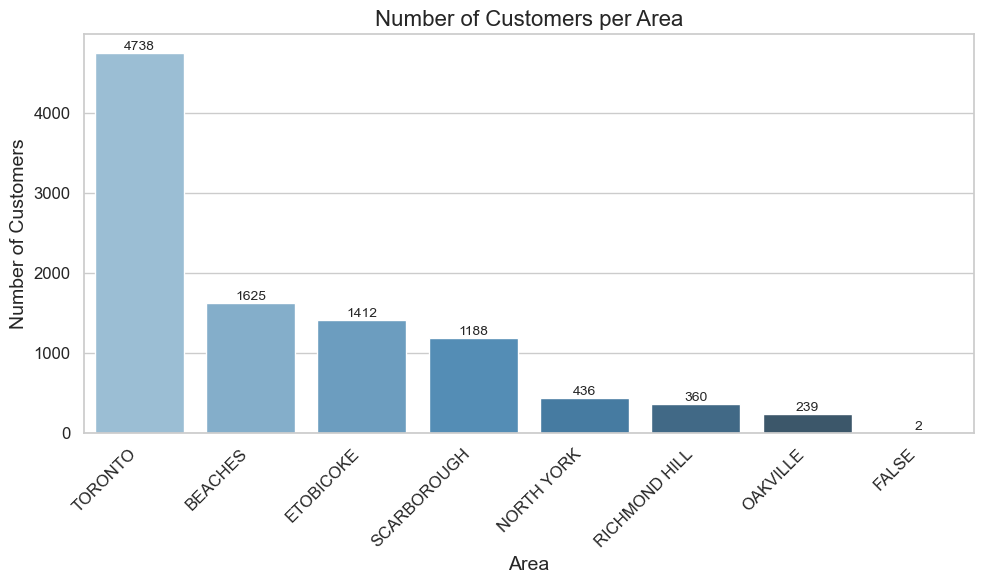

In [ ]:
customer_counts = case_data.groupby('AREA').size().sort_values(ascending=False)

sns.set(style="whitegrid")

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=customer_counts.index, y=customer_counts.values, palette="Blues_d")
plt.title('Number of Customers per Area', fontsize=16)
plt.xlabel('Area', fontsize=14)
plt.ylabel('Number of Customers', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Add data labels to the top of the bars
for index, value in enumerate(customer_counts):
    plt.text(index, value + 1, str(value), ha='center', va='bottom', fontsize=10)

plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


In [ ]:
# We have 2 rows of data with AREA = FALSE, we are removing them.
case_data = case_data[case_data['AREA'] != 'FALSE']

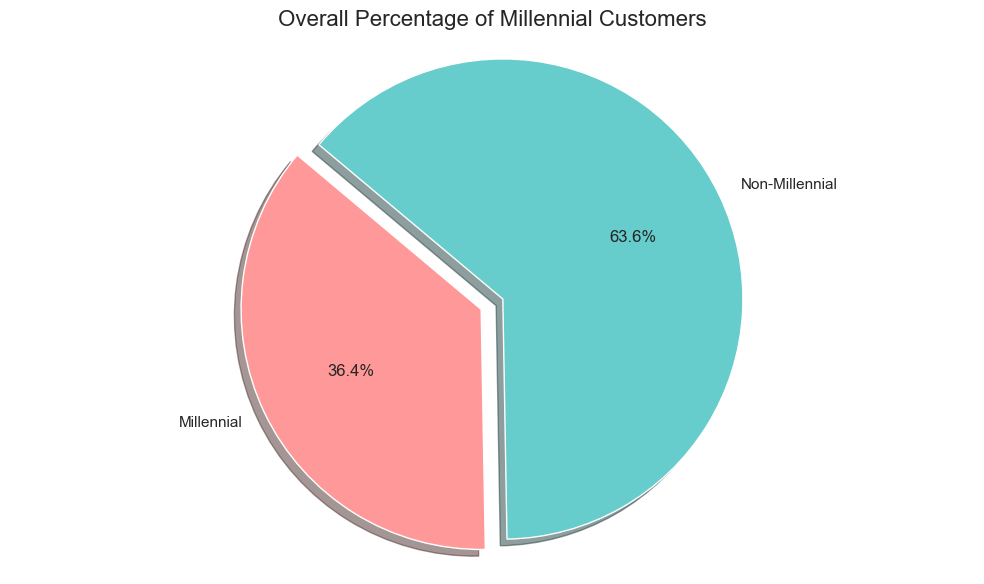

In [ ]:
overall_millennial_percentage = (case_data['MILLENNIAL'].mean()) * 100
non_millennial_percentage = 100 - overall_millennial_percentage

# Plot
plt.figure(figsize=(10, 6))
labels = ['Millennial', 'Non-Millennial']
sizes = [overall_millennial_percentage, non_millennial_percentage]
colors = ['#FF9999', '#66CCCC']
explode = (0.1, 0)  # Explode the first slice (Millennial) for emphasis
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode, shadow=True)
plt.title('Overall Percentage of Millennial Customers', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

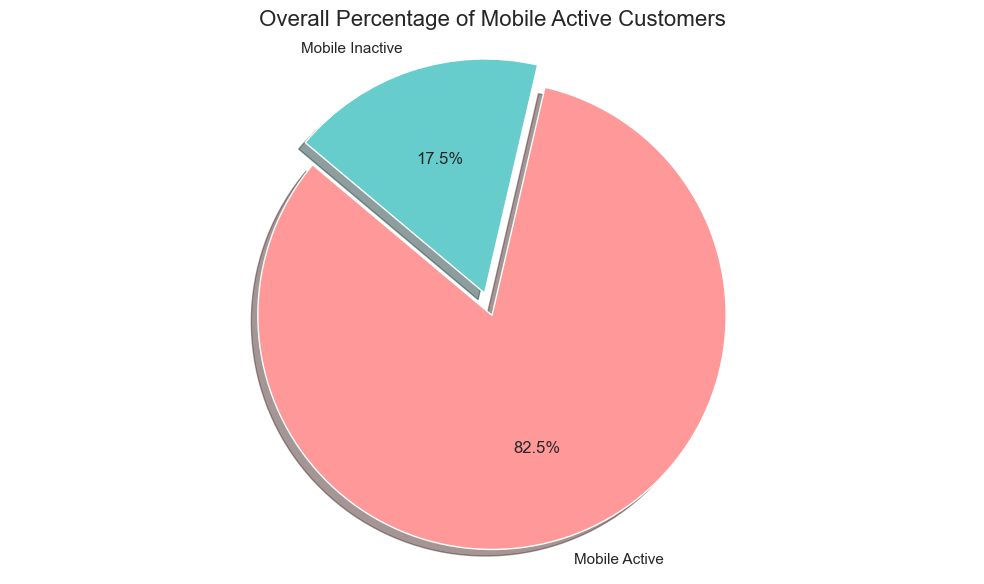

In [ ]:
overall_mobile_percentage = (case_data['MOBILE_ACTIVE'].mean()) * 100
non_mobile_percentage = 100 - overall_mobile_percentage

# Plot
plt.figure(figsize=(10, 6))
labels = ['Mobile Active', 'Mobile Inactive']
sizes = [overall_mobile_percentage, non_mobile_percentage]
colors = ['#FF9999', '#66CCCC']
explode = (0.1, 0)
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode, shadow=True)
plt.title('Overall Percentage of Mobile Active Customers', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [ ]:
case_data['CSAT'].describe()

count    4847.000000
mean       40.344130
std        68.521106
min      -100.000000
25%         0.000000
50%        67.000000
75%       100.000000
max       100.000000
Name: CSAT, dtype: float64

C:\Users\91967\AppData\Local\Temp\ipykernel_28032\2246213522.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(case_data['CSAT'], shade=True, color='skyblue')
C:\Users\91967\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


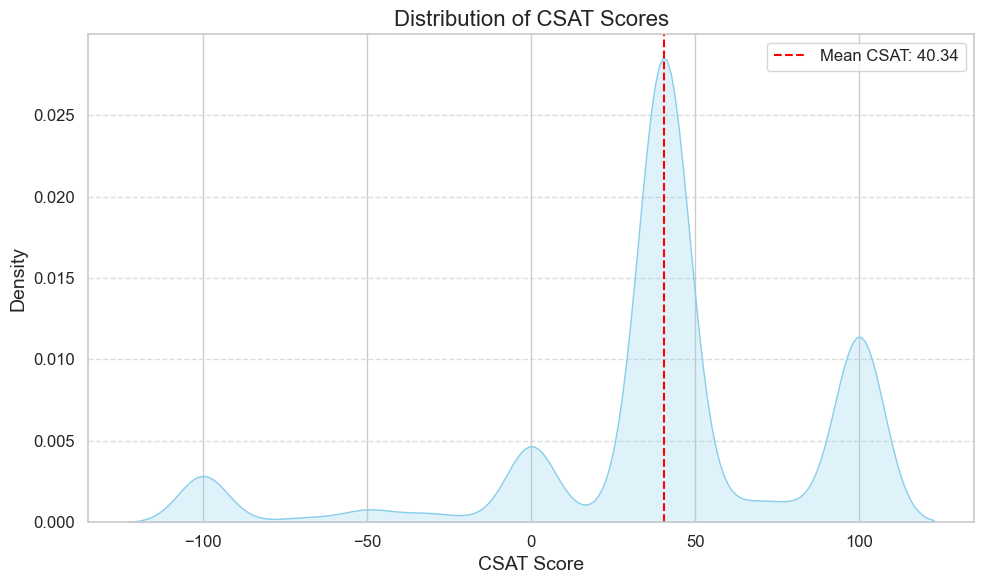

In [ ]:
# Creating a New Column to Account for Missing CSAT
case_data['CSAT_is_na'] = case_data['CSAT'].isnull().astype(int)

# Impute missing values in 'CSAT' column with the mean
mean_csat = case_data['CSAT'].mean()
case_data['CSAT'] = case_data['CSAT'].fillna(mean_csat)

plt.figure(figsize=(10, 6))
sns.kdeplot(case_data['CSAT'], shade=True, color='skyblue')
plt.axvline(x=mean_csat, color='red', linestyle='--', label=f'Mean CSAT: {mean_csat:.2f}')
plt.title('Distribution of CSAT Scores', fontsize=16)
plt.xlabel('CSAT Score', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

There may be a potential bias, since we are imputing a lot values with the mean. However, we have created a new column to account for whether the CSAT is NA or Not. We prefer this over removing the data for 5,151 users.

C:\Users\91967\AppData\Local\Temp\ipykernel_28032\1121950299.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(case_data['ACQ_SCORE'], shade=True, color='skyblue')
C:\Users\91967\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


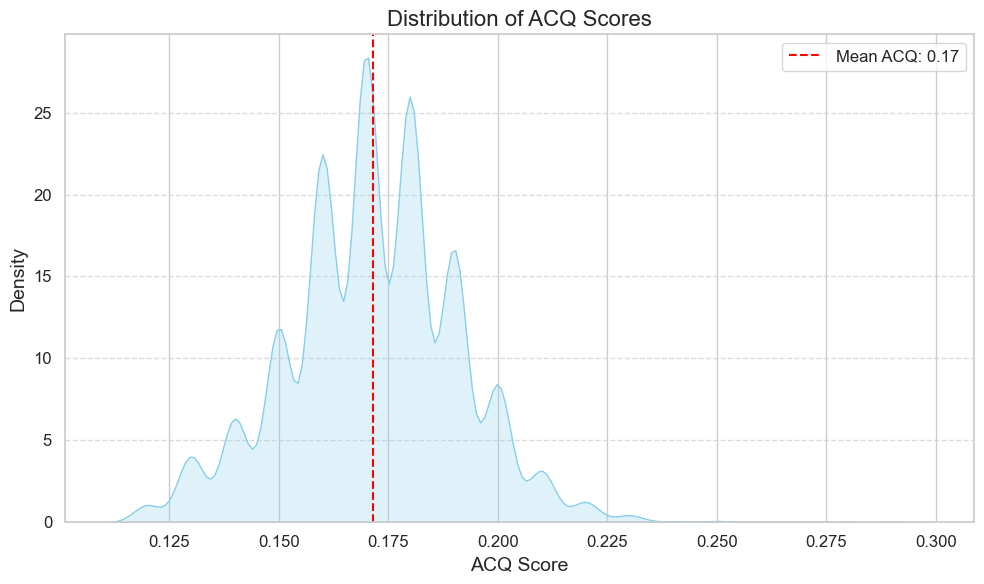

In [ ]:
mean_acq = case_data['ACQ_SCORE'].mean()

plt.figure(figsize=(10, 6))
sns.kdeplot(case_data['ACQ_SCORE'], shade=True, color='skyblue')
plt.axvline(x=mean_acq, color='red', linestyle='--', label=f'Mean ACQ: {mean_acq:.2f}')
plt.title('Distribution of ACQ Scores', fontsize=16)
plt.xlabel('ACQ Score', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

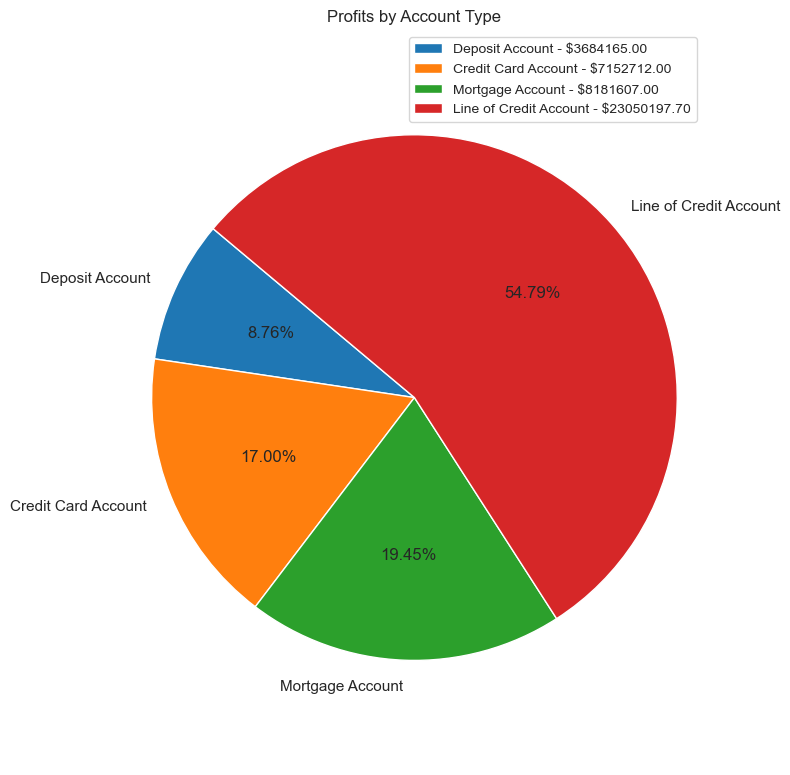

In [ ]:
profits = case_data[['DEP_PROF', 'CC_PROF', 'MTG_PROF', 'LOC_PROF']].sum()

# Customize legend labels
legend_labels = ['Deposit Account', 'Credit Card Account', 'Mortgage Account', 'Line of Credit Account']

# Plot
plt.figure(figsize=(8, 8))
colors = plt.cm.tab10.colors  # Using a color palette for better visualization
plt.pie(profits.values, labels=legend_labels, autopct=lambda pct: '{:.2f}%'.format(pct), startangle=140, colors=colors)
plt.title('Profits by Account Type')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Add legend with custom labels
plt.legend(loc="best", labels=['{} - ${:.2f}'.format(label, profit) for label, profit in zip(legend_labels, profits)], fontsize=10)
plt.tight_layout()
plt.show()

In [ ]:
case_data['CLV_DEPOSITS'] = case_data['CLV_DEPOSITS'].str.replace('$', '').str.replace(',', '').astype(float)

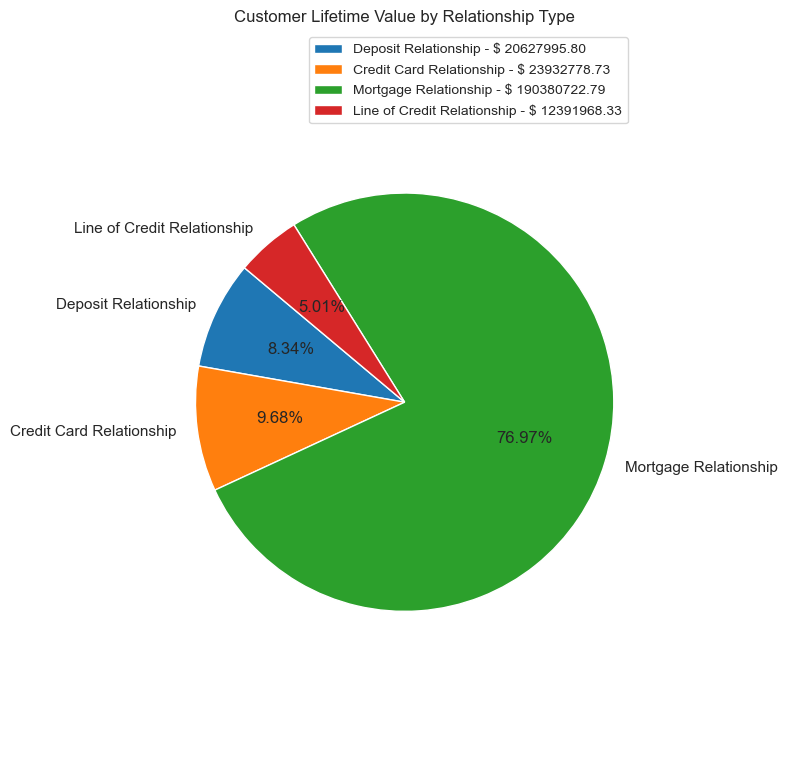

In [ ]:
clv_data = case_data[['CLV_DEPOSITS', 'CLV_CREDITCARD', 'CLV_MORTGAGE', 'CLV_LOC']].sum()

# Customize legend labels
legend_labels = ['Deposit Relationship', 'Credit Card Relationship', 'Mortgage Relationship', 'Line of Credit Relationship']

# Plot
plt.figure(figsize=(8, 8))
colors = plt.cm.tab10.colors  # Using a color palette for better visualization
plt.pie(clv_data.values, labels=legend_labels, autopct=lambda pct: '{:.2f}%'.format(pct), startangle=140, colors=colors)
plt.title('Customer Lifetime Value by Relationship Type')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Add legend with custom labels
plt.legend(loc="best", labels=['{} - $ {:.2f}'.format(label, clv) for label, clv in zip(legend_labels, clv_data)], fontsize=10)
plt.tight_layout()
plt.show()

### Data Pre-Processing

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
case_data['Age_Group'].unique()

array(['51 or higher', '31-50', '30 or under'], dtype=object)

In [ ]:
custom_order = ['30 or under','31-50','51 or higher']

ordinal_encoder = OrdinalEncoder(categories=[custom_order])
data_encoded = ordinal_encoder.fit_transform(case_data['Age_Group'].values.reshape(-1, 1))

encoded_df = pd.DataFrame(data_encoded, columns=['Age_Group'])

# Merge the encoded column back into the original DataFrame and replace the old column
case_data['Age_Group'] = encoded_df['Age_Group']

In [ ]:
case_data['Age_Group'].unique()

array([ 2.,  1.,  0., nan])

In [ ]:
case_data['Age_Group'].value_counts()

Age_Group
2.0    4710
1.0    3628
0.0    1658
Name: count, dtype: int64

In [ ]:
case_data['Tenure'].unique()

array(['21-30 years', '11-20 years', '10 years or under',
       '30 years or higher'], dtype=object)

In [ ]:
custom_order = ['10 years or under','11-20 years','21-30 years','30 years or higher']

ordinal_encoder = OrdinalEncoder(categories=[custom_order])
data_encoded = ordinal_encoder.fit_transform(case_data['Tenure'].values.reshape(-1, 1))

encoded_df = pd.DataFrame(data_encoded, columns=['Tenure'])

# Merge the encoded column back into the original DataFrame and replace the old column
case_data['Tenure'] = encoded_df['Tenure']

In [ ]:
case_data['Tenure'].unique()

array([ 2.,  1.,  0.,  3., nan])

In [ ]:
case_data['Tenure'].value_counts()

Tenure
2.0    3182
0.0    2480
1.0    2257
3.0    2077
Name: count, dtype: int64

In [ ]:
case_data['CX_QUALITY'].unique()

array(['741-780', '861 or higher', '821-860', '661-700', '781-820',
       '561-660', '701-740', '560 or lower', nan], dtype=object)

In [ ]:
custom_order = ['560 or lower', '561-660', '661-700', '701-740', '741-780', '781-820', '821-860', '861 or higher',np.nan]

ordinal_encoder = OrdinalEncoder(categories=[custom_order])
data_encoded = ordinal_encoder.fit_transform(case_data['CX_QUALITY'].values.reshape(-1, 1))

encoded_df = pd.DataFrame(data_encoded, columns=['CX_QUALITY'])

# Calculate the mean
mean = encoded_df['CX_QUALITY'].mean()

# Fill NaN values with the mean
encoded_df.fillna(0, inplace=True)

# Merge the encoded column back into the original DataFrame and replace the old column
case_data['CX_QUALITY'] = encoded_df['CX_QUALITY']

In [ ]:
case_data['CX_QUALITY'].unique()

array([ 4.,  7.,  6.,  2.,  5.,  1.,  3.,  0., nan])

In [ ]:
case_data['CX_QUALITY'].value_counts()

CX_QUALITY
6.0    2117
7.0    2010
5.0    1689
4.0    1406
3.0    1274
2.0     906
1.0     517
0.0      77
Name: count, dtype: int64

In [ ]:
case_data['SEGMENT'].unique()

array(['Gold', 'Platinum', 'Silver', 'Bronze', nan], dtype=object)

In [ ]:
custom_order = ['Bronze', 'Silver', 'Gold', 'Platinum',np.nan]

ordinal_encoder = OrdinalEncoder(categories=[custom_order])
data_encoded = ordinal_encoder.fit_transform(case_data['SEGMENT'].values.reshape(-1, 1))

encoded_df = pd.DataFrame(data_encoded, columns=['SEGMENT'])

# Calculate the mean
mean = encoded_df['SEGMENT'].mean()

# Fill NaN values with the mean
encoded_df.fillna(0, inplace=True)

# Merge the encoded column back into the original DataFrame and replace the old column
case_data['SEGMENT'] = encoded_df['SEGMENT']

In [ ]:
case_data['SEGMENT'].unique()

array([ 2.,  3.,  1.,  0., nan])

In [ ]:
case_data['SEGMENT'].value_counts()

SEGMENT
3.0    5791
2.0    2482
1.0     962
0.0     761
Name: count, dtype: int64

In [ ]:
case_data.dtypes

Customer_No          int64
Age_Group          float64
Tenure             float64
DEP_IND              int64
CC_IND               int64
MTG_IND              int64
LOC_IND              int64
DEP_PROF             int64
CC_PROF              int64
MTG_PROF             int64
LOC_PROF           float64
AREA                object
MOBILE_ACTIVE        int64
PAYROLL_DEPOSIT      int64
CSAT               float64
CX_QUALITY         float64
CUST_ENGAGEMENT      int64
CUST_AFFLUENCE       int64
SEGMENT            float64
CLV_DEPOSITS       float64
CLV_CREDITCARD     float64
CLV_MORTGAGE       float64
CLV_LOC            float64
ACQ_SCORE          float64
EMAILABLE            int64
MAILABLE             int64
MILLENNIAL           int64
CSAT_is_na           int32
dtype: object

In [ ]:
one_hot_encoded = pd.get_dummies(case_data['AREA'], prefix='AREA').astype(int)

# Concatenate the one-hot encoded columns with the original DataFrame
case_data = pd.concat([case_data, one_hot_encoded], axis=1)

# Drop the original 'AREA' column
case_data.drop(columns=['AREA'], inplace=True)

In [ ]:
case_data.dropna(inplace=True)

In [ ]:
case_data

,Customer_No,Age_Group,Tenure,DEP_IND,CC_IND,MTG_IND,LOC_IND,DEP_PROF,CC_PROF,MTG_PROF,...,MAILABLE,MILLENNIAL,CSAT_is_na,AREA_BEACHES,AREA_ETOBICOKE,AREA_NORTH YORK,AREA_OAKVILLE,AREA_RICHMOND HILL,AREA_SCARBOROUGH,AREA_TORONTO
0,1,2.0,2.0,1,0,0,1,-106,0,0,...,1,0,1,0,0,0,0,0,0,1
1,2,1.0,2.0,1,0,0,1,-186,0,0,...,0,0,1,0,0,0,0,0,0,1
2,3,1.0,2.0,1,1,1,1,-193,984,1402,...,1,1,1,0,0,0,0,0,0,1
3,4,1.0,2.0,1,1,1,1,-216,1550,3338,...,1,0,0,0,0,0,0,0,1,0
4,5,2.0,2.0,1,1,1,1,86,359,-255,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,9994,1.0,0.0,0,0,1,1,0,0,2010,...,1,1,1,0,0,0,0,0,0,1
9994,9995,2.0,3.0,1,1,0,0,-99,424,0,...,1,0,1,0,0,0,0,0,0,1
9995,9996,0.0,0.0,1,1,1,0,-141,-1559,10588,...,0,1,0,0,0,0,0,0,0,1
9996,9997,1.0,2.0,1,1,1,1,-156,711,1625,...,1,0,1,0,0,0,0,0,0,1


In [ ]:
case_data.dtypes

Customer_No             int64
Age_Group             float64
Tenure                float64
DEP_IND                 int64
CC_IND                  int64
MTG_IND                 int64
LOC_IND                 int64
DEP_PROF                int64
CC_PROF                 int64
MTG_PROF                int64
LOC_PROF              float64
MOBILE_ACTIVE           int64
PAYROLL_DEPOSIT         int64
CSAT                  float64
CX_QUALITY            float64
CUST_ENGAGEMENT         int64
CUST_AFFLUENCE          int64
SEGMENT               float64
CLV_DEPOSITS          float64
CLV_CREDITCARD        float64
CLV_MORTGAGE          float64
CLV_LOC               float64
ACQ_SCORE             float64
EMAILABLE               int64
MAILABLE                int64
MILLENNIAL              int64
CSAT_is_na              int32
AREA_BEACHES            int32
AREA_ETOBICOKE          int32
AREA_NORTH YORK         int32
AREA_OAKVILLE           int32
AREA_RICHMOND HILL      int32
AREA_SCARBOROUGH        int32
AREA_TORON

In [ ]:
case_data['TOTAL_PROF'] = case_data['DEP_PROF'] + case_data['CC_PROF'] + case_data['MTG_PROF'] + case_data['LOC_PROF']
case_data['TOTAL_CLV'] = case_data['CLV_DEPOSITS'] + case_data['CLV_CREDITCARD'] + case_data['CLV_MORTGAGE'] + case_data['CLV_LOC']

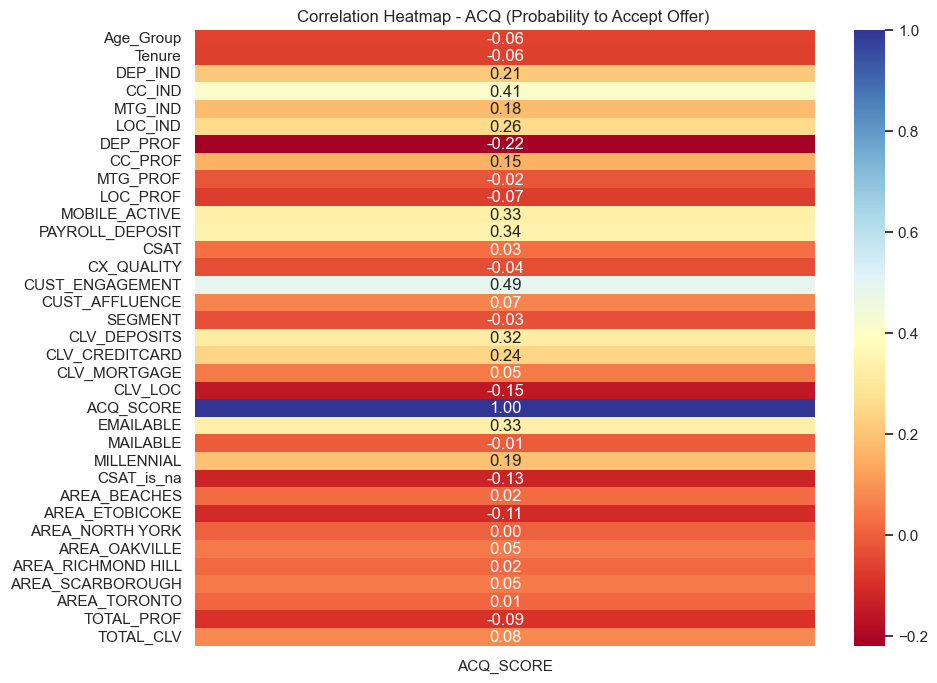

In [ ]:
# Drop 'Customer_No'
filtered_data = case_data.drop(columns=['Customer_No'])

# Compute the correlation matrix
correlation_matrix = filtered_data.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix[['ACQ_SCORE']], annot=True, cmap='RdYlBu', fmt=".2f")
plt.title('Correlation Heatmap - ACQ (Probability to Accept Offer) ')
plt.show()

We have performed the customer analytics & insights through our exploratory data analysis. Now lets, look into segmenting the customer based on the accounts

Priortization Framework:
- Expected Value (EV) = Lifetime Value * Likelihood to Respond * Strategic Priority

First, lets calculate strategic priority.

GTA Bank Customer Focus:
- Due to the high switch rate of millennials (20%), we need to ensure effective strategies to retain these millennials.
- Additionally, we can also look to acquire these millennials, because they are more open to switching.
- Customer Acquisition Budget: \$50,000,000
- Per Customer Acquisition Budget: \$250
- Customer Retention Budget: \$5,000,000

Let us first attribute the profits to the corresponding channels using Shapley Values Based Attribution. We are considering the channels as Mobile Active (Notifications), Mailing & E-Mailing.

In [ ]:
channels = ['MOBILE_ACTIVE', 'EMAILABLE', 'MAILABLE']

In [ ]:
from collections import defaultdict
import math
from itertools import combinations

def shapley_profit_attribution(channels,profit):
    subsets = [list(combo) for i in range(len(channels) + 1) for combo in combinations(channels, i)]

    # Compute sales for each subset
    subset_sales = {}
    for subset in subsets:
        if subset:
            mask = case_data[subset].eq(1).all(axis=1)
            subset_sales[tuple(subset)] = case_data[mask][profit].sum()
        else:
            subset_sales[tuple(subset)] = 0

    # Compute marginal contributions
    marginal_contributions = {}
    for channel in channels:
        for subset in [s for s in subsets if channel not in s]:  # Ensure the channel is not in the subset
            subset_with_channel = tuple(sorted(subset + [channel]))
            without_channel = tuple(subset)
            # Calculate marginal contribution
            if subset_with_channel in subset_sales:
                marginal_contributions[(subset_with_channel, channel)] = (
                    subset_sales[subset_with_channel] - subset_sales[without_channel]
                )
            else:
                marginal_contributions[(subset_with_channel, channel)] = 0


    # Initialize dictionary to hold Shapley values
    shapley_values = defaultdict(int)

    # Calculate the Shapley values
    for (coalition, channel), marginal in marginal_contributions.items():
        # Calculate the factorial terms for Shapley value formula
        n = len(channels)
        s = len(coalition) - 1
        weight = math.factorial(s) * math.factorial(n - s - 1) / math.factorial(n)

        # Adding the weighted marginal contribution
        shapley_values[channel] += marginal * weight

    # Normalize Shapley values by the total number of permutations (factorial of number of channels)
    for channel in shapley_values:
        shapley_values[channel] /= math.factorial(len(channels))

    return dict(shapley_values)

In [ ]:
DEP_profit_shapley_attribution = shapley_profit_attribution(channels,'DEP_PROF')
DEP_profit_shapley_attribution

{'MOBILE_ACTIVE': 114087.16666666667,
 'EMAILABLE': 87928.05555555556,
 'MAILABLE': 90634.30555555556}

In [ ]:
CC_profit_shapley_attribution = shapley_profit_attribution(channels,'CC_PROF')
CC_profit_shapley_attribution

{'MOBILE_ACTIVE': 349959.5,
 'EMAILABLE': 337687.6388888889,
 'MAILABLE': 141916.3888888889}

In [ ]:
MTG_profit_shapley_attribution = shapley_profit_attribution(channels,'MTG_PROF')
MTG_profit_shapley_attribution

{'MOBILE_ACTIVE': 359728.8888888888,
 'EMAILABLE': 334722.5555555555,
 'MAILABLE': 158383.05555555553}

In [ ]:
LOC_profit_shapley_attribution = shapley_profit_attribution(channels,'LOC_PROF')
LOC_profit_shapley_attribution

{'MOBILE_ACTIVE': 996128.0944444445,
 'EMAILABLE': 918067.5708333334,
 'MAILABLE': 479861.0708333333}

In [ ]:
TOTAL_profit_shapley_attribution = shapley_profit_attribution(channels,'TOTAL_PROF')
TOTAL_profit_shapley_attribution

{'MOBILE_ACTIVE': 1819903.6500000001,
 'EMAILABLE': 1678405.8208333335,
 'MAILABLE': 870794.8208333332}

**1st Strategic Priority: Customer Acquisition**

**Predictive Based Approach**

Unfortunately, when it comes to acquiring new customers, we do not have information of their banking data, we only have information regarding their demographic data.

In [ ]:
case_data.columns

Index(['Customer_No', 'Age_Group', 'Tenure', 'DEP_IND', 'CC_IND', 'MTG_IND',
       'LOC_IND', 'DEP_PROF', 'CC_PROF', 'MTG_PROF', 'LOC_PROF',
       'MOBILE_ACTIVE', 'PAYROLL_DEPOSIT', 'CSAT', 'CX_QUALITY',
       'CUST_ENGAGEMENT', 'CUST_AFFLUENCE', 'SEGMENT', 'CLV_DEPOSITS',
       'CLV_CREDITCARD', 'CLV_MORTGAGE', 'CLV_LOC', 'ACQ_SCORE', 'EMAILABLE',
       'MAILABLE', 'MILLENNIAL', 'CSAT_is_na', 'AREA_BEACHES',
       'AREA_ETOBICOKE', 'AREA_NORTH YORK', 'AREA_OAKVILLE',
       'AREA_RICHMOND HILL', 'AREA_SCARBOROUGH', 'AREA_TORONTO', 'TOTAL_PROF',
       'TOTAL_CLV'],
      dtype='object')

In [ ]:
acquisition_data = case_data[['Age_Group','Tenure','PAYROLL_DEPOSIT','MILLENNIAL','AREA_BEACHES','AREA_ETOBICOKE', 'AREA_NORTH YORK', 'AREA_OAKVILLE','AREA_RICHMOND HILL', 'AREA_SCARBOROUGH', 'AREA_TORONTO']]

In [ ]:
acquisition_data

,Age_Group,Tenure,PAYROLL_DEPOSIT,MILLENNIAL,AREA_BEACHES,AREA_ETOBICOKE,AREA_NORTH YORK,AREA_OAKVILLE,AREA_RICHMOND HILL,AREA_SCARBOROUGH,AREA_TORONTO
0,2.0,2.0,0,0,0,0,0,0,0,0,1
1,1.0,2.0,0,0,0,0,0,0,0,0,1
2,1.0,2.0,0,1,0,0,0,0,0,0,1
3,1.0,2.0,1,0,0,0,0,0,0,1,0
4,2.0,2.0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
9993,1.0,0.0,0,1,0,0,0,0,0,0,1
9994,2.0,3.0,0,0,0,0,0,0,0,0,1
9995,0.0,0.0,0,1,0,0,0,0,0,0,1
9996,1.0,2.0,0,0,0,0,0,0,0,0,1


Since we have a more one-hot encoded columns than others, if we scale the data, we will end up with there is a possibility that we end up with the ideal clusters as the one-hot encoded columns.

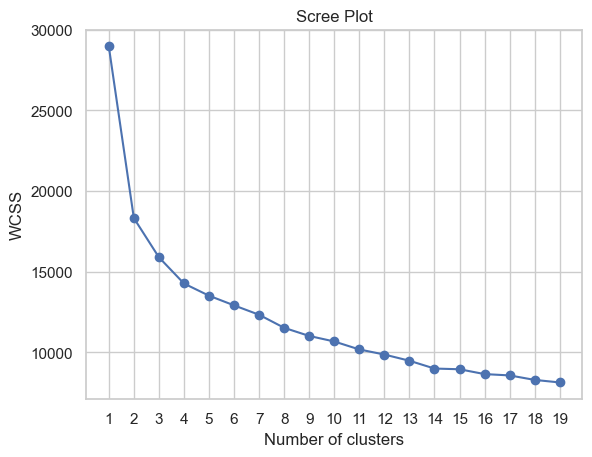

In [ ]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(acquisition_data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 20), wcss, marker='o')
plt.title('Scree Plot')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

plt.xticks(range(1, 20), [str(i) for i in range(1, 20)])

plt.show()

Based on the scree plot, we see the elbow point at clusters = 3.

In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(acquisition_data)

# Get the cluster labels
customer_labels = kmeans.labels_

C:\Users\91967\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


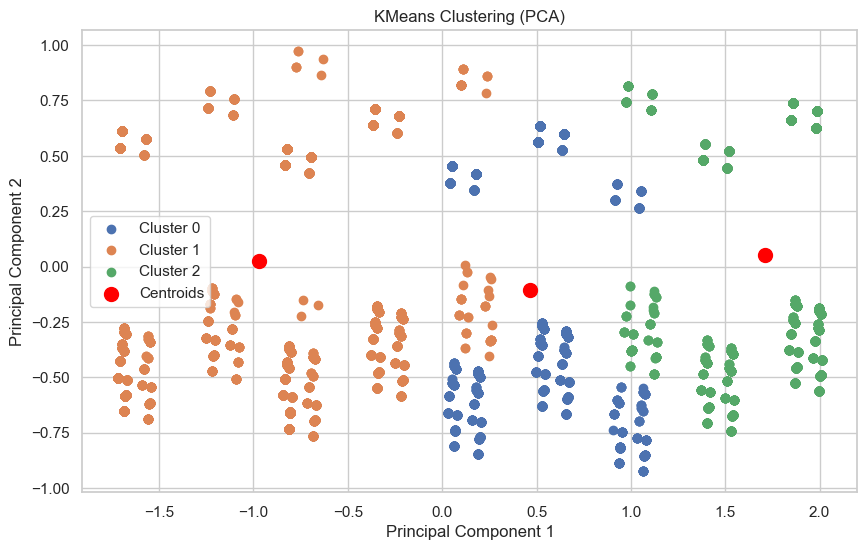

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
acquisition_data_pca = pca.fit_transform(acquisition_data)

# Plot the clusters
plt.figure(figsize=(10, 6))

# Scatter plot for each cluster
for cluster_label in range(3):
    plt.scatter(acquisition_data_pca[customer_labels == cluster_label, 0],
                acquisition_data_pca[customer_labels == cluster_label, 1],
                label=f'Cluster {cluster_label}')

# Plot centroids
centroids_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=100, c='red', label='Centroids')

plt.title('KMeans Clustering (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [ ]:
acquisition_data['acquisition_labels'] = kmeans.labels_

# Calculate feature averages for each cluster
feature_averages = acquisition_data.groupby('acquisition_labels').mean()
feature_averages

C:\Users\91967\AppData\Local\Temp\ipykernel_28032\383856842.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  acquisition_data['acquisition_labels'] = kmeans.labels_


,Age_Group,Tenure,PAYROLL_DEPOSIT,MILLENNIAL,AREA_BEACHES,AREA_ETOBICOKE,AREA_NORTH YORK,AREA_OAKVILLE,AREA_RICHMOND HILL,AREA_SCARBOROUGH,AREA_TORONTO
acquisition_labels,,,,,,,,,,,
0,1.515942,0.860870,0.544099,0.493168,0.172671,0.156108,0.055901,0.025673,0.034783,0.096480,0.458385
1,1.644609,2.394942,0.513596,0.239209,0.154782,0.124739,0.032326,0.023959,0.036319,0.143944,0.483932
2,0.317829,0.076658,0.503015,0.511197,0.169681,0.162791,0.056417,0.021964,0.036606,0.084841,0.467700


In [ ]:
case_data['acquisition_labels'] = kmeans.labels_

In [ ]:
case_data['EXPECTED_VALUE'] = case_data['TOTAL_CLV']*case_data['ACQ_SCORE']

In [ ]:
cluster_summary = case_data.groupby('acquisition_labels').agg({'EXPECTED_VALUE': ['count', 'mean']})

cluster_summary.columns = ['TOTAL_NO_CUSTOMERS', 'AVERAGE_EXPECTED_VALUE']
cluster_summary_sorted = cluster_summary.sort_values(by='AVERAGE_EXPECTED_VALUE', ascending=False)
cluster_summary_sorted

,TOTAL_NO_CUSTOMERS,AVERAGE_EXPECTED_VALUE
acquisition_labels,,
2,2322,5149.667543
0,2415,4951.785336
1,5259,3605.809329


In [ ]:
label_mapping = {0: '2nd Priority', 1: '3rd Priority', 2: '1st Priority'}

# Apply the mapping to the 'acquisition_labels' column
case_data['acquisition_labels'] = case_data['acquisition_labels'].map(label_mapping)

Therefore, based on this clustering method, we can establish which customers to reach out to first.

Now that we have the segments, we need to decide what products to sell. For this, we can refer to our existing customers behaviour for information.

In [ ]:
case_data.columns

Index(['Customer_No', 'Age_Group', 'Tenure', 'DEP_IND', 'CC_IND', 'MTG_IND',
       'LOC_IND', 'DEP_PROF', 'CC_PROF', 'MTG_PROF', 'LOC_PROF',
       'MOBILE_ACTIVE', 'PAYROLL_DEPOSIT', 'CSAT', 'CX_QUALITY',
       'CUST_ENGAGEMENT', 'CUST_AFFLUENCE', 'SEGMENT', 'CLV_DEPOSITS',
       'CLV_CREDITCARD', 'CLV_MORTGAGE', 'CLV_LOC', 'ACQ_SCORE', 'EMAILABLE',
       'MAILABLE', 'MILLENNIAL', 'CSAT_is_na', 'AREA_BEACHES',
       'AREA_ETOBICOKE', 'AREA_NORTH YORK', 'AREA_OAKVILLE',
       'AREA_RICHMOND HILL', 'AREA_SCARBOROUGH', 'AREA_TORONTO', 'TOTAL_PROF',
       'TOTAL_CLV', 'acquisition_labels', 'EXPECTED_VALUE'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import RobustScaler

clv_columns = ['CLV_DEPOSITS', 'CLV_CREDITCARD', 'CLV_MORTGAGE', 'CLV_LOC']

case_data_scaled = case_data.copy()

# Scale the selected columns
scaler = RobustScaler()
case_data_scaled[clv_columns] = scaler.fit_transform(case_data[clv_columns])

# Group by 'acquisition_labels' and calculate feature averages
feature_avgs_by_cluster1 = case_data_scaled.groupby('acquisition_labels')[clv_columns].mean()
feature_avgs_by_cluster1

,CLV_DEPOSITS,CLV_CREDITCARD,CLV_MORTGAGE,CLV_LOC
acquisition_labels,,,,
1st Priority,-0.112882,0.415691,0.580844,0.832068
2nd Priority,-0.029479,0.415425,0.512687,0.880496
3rd Priority,0.050027,0.373099,0.212603,0.983116


From the above table, we can define the strategic targets for the following:

- **1st Priority Customers**: Target Credit Card & Mortgage Accounts
- **2nd Priority Customers**: Target Credit Card & Mortgage Accounts
- **3rd Priority Customers**: Target Deposit & LOC Accounts

**2nd Strategic Priority: Customer Retenion**

**Rules Based Approach**

From our existing customers, if we estimate the customer to have a CLV > 0 for a corresponding account and they do not have that account, this creates an opportunity to cross-sell.

In [ ]:
case_data['cross_sell_DEP'] = np.where((case_data['DEP_IND'] == 0) & (case_data['CLV_DEPOSITS'] > 0), 1, 0)
case_data['cross_sell_CC'] = np.where((case_data['CC_IND'] == 0) & (case_data['CLV_CREDITCARD'] > 0), 1, 0)
case_data['cross_sell_MTG'] = np.where((case_data['MTG_IND'] == 0) & (case_data['CLV_MORTGAGE'] > 0), 1, 0)
case_data['cross_sell_LOC'] = np.where((case_data['LOC_IND'] == 0) & (case_data['CLV_LOC'] > 0), 1, 0)

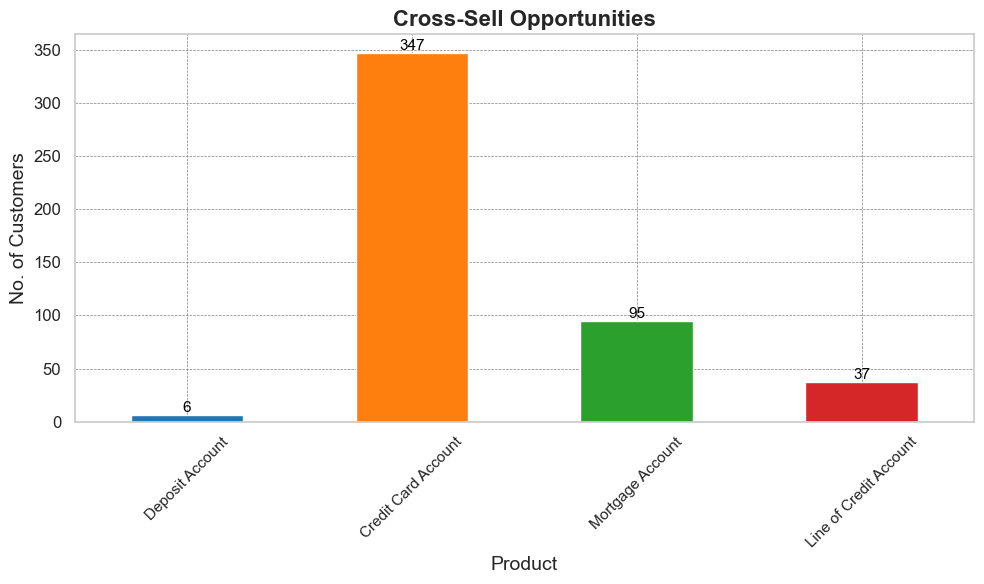

In [ ]:
cross_sell_counts = {
    'Deposit Account': case_data['cross_sell_DEP'].sum(),
    'Credit Card Account': case_data['cross_sell_CC'].sum(),
    'Mortgage Account': case_data['cross_sell_MTG'].sum(),
    'Line of Credit Account': case_data['cross_sell_LOC'].sum()
}

cross_sell_series = pd.Series(cross_sell_counts)

# Create the bar plot
ax = cross_sell_series.plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'], figsize=(10, 6))

# Set titles and labels
plt.title('Cross-Sell Opportunities', fontsize=16, fontweight='bold')
plt.xlabel('Product', fontsize=14)
plt.ylabel('No. of Customers', fontsize=14)
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.yticks(fontsize=12)

# Adding the data labels on each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                 textcoords='offset points')

# Customize the grid and layout
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='grey')
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlap

# Show the plot
plt.show()

Now, let us focus on customer statisfaction.

In [ ]:
case_data.columns

Index(['Customer_No', 'Age_Group', 'Tenure', 'DEP_IND', 'CC_IND', 'MTG_IND',
       'LOC_IND', 'DEP_PROF', 'CC_PROF', 'MTG_PROF', 'LOC_PROF',
       'MOBILE_ACTIVE', 'PAYROLL_DEPOSIT', 'CSAT', 'CX_QUALITY',
       'CUST_ENGAGEMENT', 'CUST_AFFLUENCE', 'SEGMENT', 'CLV_DEPOSITS',
       'CLV_CREDITCARD', 'CLV_MORTGAGE', 'CLV_LOC', 'ACQ_SCORE', 'EMAILABLE',
       'MAILABLE', 'MILLENNIAL', 'CSAT_is_na', 'AREA_BEACHES',
       'AREA_ETOBICOKE', 'AREA_NORTH YORK', 'AREA_OAKVILLE',
       'AREA_RICHMOND HILL', 'AREA_SCARBOROUGH', 'AREA_TORONTO', 'TOTAL_PROF',
       'TOTAL_CLV', 'acquisition_labels', 'EXPECTED_VALUE', 'cross_sell_DEP',
       'cross_sell_CC', 'cross_sell_MTG', 'cross_sell_LOC'],
      dtype='object')

In [ ]:
# Looking at the data, we did not impute to understand correlation
satisfaction_data = case_data[['Age_Group', 'Tenure', 'DEP_IND', 'CC_IND', 'MTG_IND',
       'LOC_IND', 'DEP_PROF', 'CC_PROF', 'MTG_PROF', 'LOC_PROF',
       'MOBILE_ACTIVE', 'PAYROLL_DEPOSIT', 'CSAT', 'CX_QUALITY',
       'CUST_ENGAGEMENT', 'CUST_AFFLUENCE', 'SEGMENT', 'CLV_DEPOSITS',
       'CLV_CREDITCARD', 'CLV_MORTGAGE', 'CLV_LOC', 'ACQ_SCORE', 'EMAILABLE',
       'MAILABLE', 'MILLENNIAL', 'CSAT_is_na', 'AREA_BEACHES',
       'AREA_ETOBICOKE', 'AREA_NORTH YORK', 'AREA_OAKVILLE',
       'AREA_RICHMOND HILL', 'AREA_SCARBOROUGH', 'AREA_TORONTO']][case_data['CSAT_is_na'] == 0]

In [ ]:
satisfaction_data

,Age_Group,Tenure,DEP_IND,CC_IND,MTG_IND,LOC_IND,DEP_PROF,CC_PROF,MTG_PROF,LOC_PROF,...,MAILABLE,MILLENNIAL,CSAT_is_na,AREA_BEACHES,AREA_ETOBICOKE,AREA_NORTH YORK,AREA_OAKVILLE,AREA_RICHMOND HILL,AREA_SCARBOROUGH,AREA_TORONTO
3,1.0,2.0,1,1,1,1,-216,1550,3338,-256.50,...,1,0,0,0,0,0,0,0,1,0
4,2.0,2.0,1,1,1,1,86,359,-255,122.55,...,1,0,0,0,0,0,0,0,0,1
5,1.0,1.0,0,1,1,1,0,-118,8487,1275.85,...,1,1,0,1,0,0,0,0,0,0
6,2.0,2.0,1,1,1,1,-204,687,-1536,2354.10,...,1,0,0,0,0,0,0,0,0,1
7,1.0,2.0,1,1,1,1,-262,1089,-2519,1607.40,...,1,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9980,1.0,0.0,0,1,1,1,0,-333,3989,-202.35,...,0,0,0,0,0,0,0,0,0,1
9987,1.0,0.0,0,0,1,1,0,0,3158,-164.35,...,1,1,0,0,1,0,0,0,0,0
9988,2.0,2.0,1,0,1,1,38,0,6062,15220.90,...,0,0,0,0,0,0,0,0,0,1
9992,1.0,1.0,1,1,0,1,-160,1801,0,855.00,...,0,0,0,1,0,0,0,0,0,0


C:\Users\91967\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


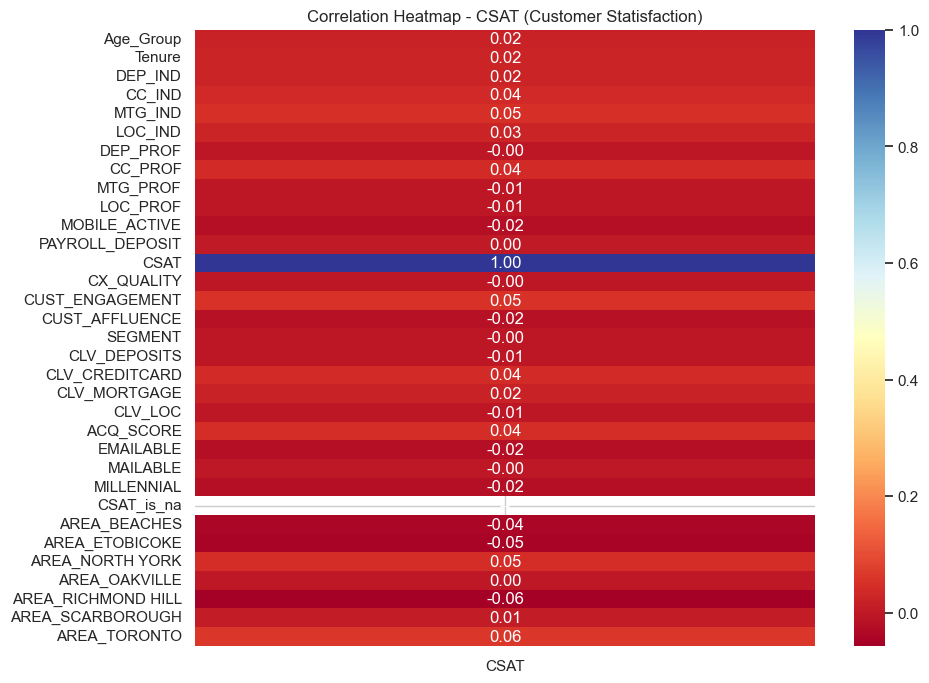

In [ ]:
# Compute the correlation matrix
correlation_matrix2 = satisfaction_data.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix2[['CSAT']], annot=True, cmap='RdYlBu', fmt=".2f")
plt.title('Correlation Heatmap - CSAT (Customer Statisfaction)')
plt.show()

From the correlation heatmap of CSAT, we see that it is not really correlated with other factors in the dataset. however, we can see the highest correlation are for factors:
- AREAS
- CUST_ENGAGEMENT
- MTG_IND

In [ ]:
satisfaction_data['CSAT']

3       100.0
4         0.0
5         0.0
6         0.0
7       100.0
        ...  
9980      0.0
9987      0.0
9988     50.0
9992      0.0
9995    100.0
Name: CSAT, Length: 4847, dtype: float64

In [ ]:
case_data['CSAT_decile'], bins = pd.qcut(case_data['CSAT'], q=10, labels=False,duplicates='drop', retbins=True)

In [ ]:
case_data['CSAT_decile'].value_counts()

CSAT_decile
2    5180
3    2816
0    1755
1     245
Name: count, dtype: int64

In [ ]:
decile_summary = case_data.groupby('CSAT_decile').agg({'EXPECTED_VALUE': ['count', 'mean'],'CSAT':['mean']})

decile_summary.columns = ['TOTAL_NO_CUSTOMERS', 'AVERAGE_EXPECTED_VALUE','AVERAGE_CSAT']
decile_summary_sorted = decile_summary.sort_values(by='AVERAGE_EXPECTED_VALUE', ascending=False)
decile_summary_sorted

,TOTAL_NO_CUSTOMERS,AVERAGE_EXPECTED_VALUE,AVERAGE_CSAT
CSAT_decile,,,
3,2816,4386.980010,91.145241
2,5180,4318.507933,40.341299
1,245,4194.377863,28.044898
0,1755,4061.431058,-39.443875


In [ ]:
case_data.columns

Index(['Customer_No', 'Age_Group', 'Tenure', 'DEP_IND', 'CC_IND', 'MTG_IND',
       'LOC_IND', 'DEP_PROF', 'CC_PROF', 'MTG_PROF', 'LOC_PROF',
       'MOBILE_ACTIVE', 'PAYROLL_DEPOSIT', 'CSAT', 'CX_QUALITY',
       'CUST_ENGAGEMENT', 'CUST_AFFLUENCE', 'SEGMENT', 'CLV_DEPOSITS',
       'CLV_CREDITCARD', 'CLV_MORTGAGE', 'CLV_LOC', 'ACQ_SCORE', 'EMAILABLE',
       'MAILABLE', 'MILLENNIAL', 'CSAT_is_na', 'AREA_BEACHES',
       'AREA_ETOBICOKE', 'AREA_NORTH YORK', 'AREA_OAKVILLE',
       'AREA_RICHMOND HILL', 'AREA_SCARBOROUGH', 'AREA_TORONTO', 'TOTAL_PROF',
       'TOTAL_CLV', 'acquisition_labels', 'EXPECTED_VALUE', 'cross_sell_DEP',
       'cross_sell_CC', 'cross_sell_MTG', 'cross_sell_LOC', 'CSAT_decile'],
      dtype='object')

In [ ]:
clustering_2_data = case_data[['Age_Group', 'Tenure', 'DEP_IND', 'CC_IND', 'MTG_IND',
       'LOC_IND', 'DEP_PROF', 'CC_PROF', 'MTG_PROF', 'LOC_PROF',
       'MOBILE_ACTIVE', 'PAYROLL_DEPOSIT', 'CSAT', 'CX_QUALITY',
       'CUST_ENGAGEMENT', 'CUST_AFFLUENCE', 'SEGMENT', 'CLV_DEPOSITS',
       'CLV_CREDITCARD', 'CLV_MORTGAGE', 'CLV_LOC', 'ACQ_SCORE', 'EMAILABLE',
       'MAILABLE', 'MILLENNIAL', 'CSAT_is_na', 'AREA_BEACHES',
       'AREA_ETOBICOKE', 'AREA_NORTH YORK', 'AREA_OAKVILLE',
       'AREA_RICHMOND HILL', 'AREA_SCARBOROUGH', 'AREA_TORONTO', 'TOTAL_PROF',
       'TOTAL_CLV']]

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
clustering2_scaled = scaler.fit_transform(clustering_2_data.drop(columns=['ACQ_SCORE']))

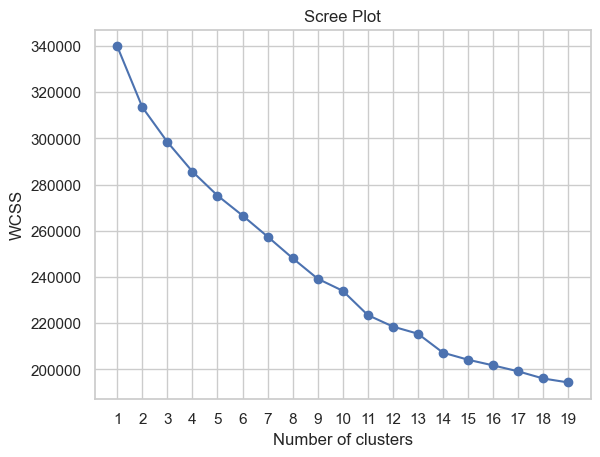

In [ ]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(clustering2_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 20), wcss, marker='o')
plt.title('Scree Plot')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

plt.xticks(range(1, 20), [str(i) for i in range(1, 20)])

plt.show()

In [ ]:
kmeans = KMeans(n_clusters=12, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(clustering2_scaled)

# Get the cluster labels
customer_labels = kmeans.labels_

In [ ]:
clustering_2_data['transactional_labels'] = kmeans.labels_

# Calculate feature averages for each cluster
feature_averages = clustering_2_data.groupby('transactional_labels').mean()
feature_averages

C:\Users\91967\AppData\Local\Temp\ipykernel_28032\1284224587.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_2_data['transactional_labels'] = kmeans.labels_


,Age_Group,Tenure,DEP_IND,CC_IND,MTG_IND,LOC_IND,DEP_PROF,CC_PROF,MTG_PROF,LOC_PROF,...,CSAT_is_na,AREA_BEACHES,AREA_ETOBICOKE,AREA_NORTH YORK,AREA_OAKVILLE,AREA_RICHMOND HILL,AREA_SCARBOROUGH,AREA_TORONTO,TOTAL_PROF,TOTAL_CLV
transactional_labels,,,,,,,,,,,,,,,,,,,,,
0,1.314607,1.483146,0.949438,0.851124,0.612360,0.870787,143.011236,876.519663,491.730337,1874.440730,...,0.516854,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,3385.701966,19663.263385
1,1.354460,1.600939,0.936620,1.000000,0.366197,0.737089,145.715962,5188.478873,185.967136,1629.704930,...,0.509390,0.096244,0.077465,0.004695,0.000000,0.002347,0.072770,0.746479,7149.866901,19612.294577
2,1.616114,2.113744,1.000000,0.511848,0.014218,0.218009,9691.146919,67.853081,0.654028,155.381280,...,0.748815,0.099526,0.165877,0.014218,0.000000,0.004739,0.151659,0.563981,9915.035308,3872.925000
3,1.245267,1.376132,0.979424,0.837037,0.628807,0.894650,125.727572,619.883128,696.317695,1441.924856,...,0.458436,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2883.853251,21925.489346
4,1.167969,0.941406,0.800781,0.560547,0.998047,0.851562,195.804688,417.708984,7426.953125,1817.682129,...,0.601562,0.119141,0.240234,0.011719,0.000000,0.001953,0.011719,0.615234,9858.148926,101594.676328
5,1.270042,1.493671,0.983122,0.869198,0.679325,0.894515,137.210970,931.371308,742.156118,1664.231646,...,0.464135,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3474.970042,19964.953207
6,1.374046,1.609839,0.858355,0.625106,0.480916,0.692112,344.659033,398.274809,410.324003,1601.755598,...,0.768448,0.167091,0.169635,0.000848,0.000000,0.000000,0.115352,0.547074,2755.013444,16698.696264
7,1.352273,1.729339,0.982438,0.829545,0.621901,0.912190,102.527893,582.829545,421.445248,1584.776653,...,0.472107,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2691.579339,15415.451823
8,1.297237,1.507069,0.982648,0.870501,0.663239,0.878856,135.509319,449.026350,375.441195,1292.798281,...,0.447301,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2252.775145,21678.103988


In [ ]:
clustering_2_data['EXPECTED_VALUE'] = clustering_2_data['TOTAL_CLV']*clustering_2_data['ACQ_SCORE']
cluster_summary2 = clustering_2_data.groupby('transactional_labels').agg({'EXPECTED_VALUE': ['count', 'mean'], 'CSAT':['mean']})

cluster_summary2.columns = ['TOTAL_NO_CUSTOMERS', 'AVERAGE_EXPECTED_VALUE', 'AVERAGE_CSAT']
cluster_summary2_sorted = cluster_summary2.sort_values(by='AVERAGE_EXPECTED_VALUE', ascending=False)
cluster_summary2_sorted

C:\Users\91967\AppData\Local\Temp\ipykernel_28032\1503541242.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_2_data['EXPECTED_VALUE'] = clustering_2_data['TOTAL_CLV']*clustering_2_data['ACQ_SCORE']


,TOTAL_NO_CUSTOMERS,AVERAGE_EXPECTED_VALUE,AVERAGE_CSAT
transactional_labels,,,
4,512,17097.991975,40.082016
9,928,4490.850980,35.670996
10,434,4311.779343,37.597222
11,418,4244.882827,47.284864
3,1215,3898.928603,37.546239
8,3112,3859.288663,41.669675
5,237,3596.712963,39.843267
1,426,3547.472227,47.461681
0,356,3446.938501,30.793034


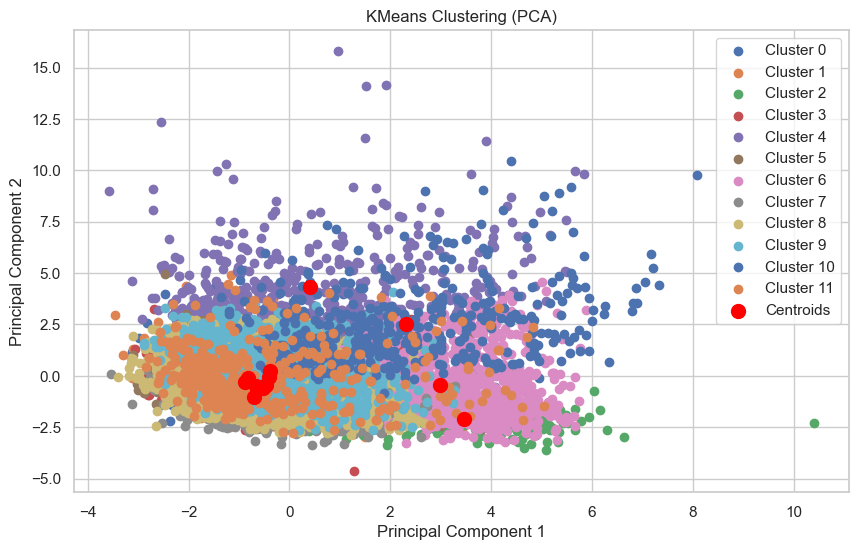

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
clustering2_scaled_pca = pca.fit_transform(clustering2_scaled)

# Plot the clusters
plt.figure(figsize=(10, 6))

# Scatter plot for each cluster
for cluster_label in range(12):
    plt.scatter(clustering2_scaled_pca[customer_labels == cluster_label, 0],
                clustering2_scaled_pca[customer_labels == cluster_label, 1],
                label=f'Cluster {cluster_label}')

# Plot centroids
centroids_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=100, c='red', label='Centroids')

plt.title('KMeans Clustering (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


###From the analysis of the above, several key insights about the customer base can be derived:

1. **Customer Distribution by Area**:
   - Toronto has a significantly higher number of customers (4,738) compared to other areas, followed by the Beaches and Etobicoke. This suggests a strong market presence in Toronto but also indicates potential over-saturation or high competition.
   - Areas like Oakville and Richmond Hill have fewer customers, which could represent opportunities for expansion or targeted marketing campaigns.
   

2. **Demographic Insights**:
   - Millennials constitute 36.4% of the customer base, suggesting a substantial portion of the clientele is relatively younger. This demographic is generally more receptive to digital banking solutions, which aligns with the data showing a high percentage of mobile-active customers (82.5%).
   - Given the high mobile usage, digital engagement strategies could be particularly effective in enhancing customer experience and retention.
   

3. **Customer Satisfaction and Engagement**:
   - The Customer Satisfaction (CSAT) score distribution peaks around 40.34, which suggests moderate satisfaction. Strategies to enhance customer experience could focus on areas generating lower satisfaction scores to elevate overall satisfaction levels.
   - The Acquisition Quality (ACQ) score has a mean of 0.17, indicating room for improvement in the effectiveness of marketing and customer acquisition strategies.


4. **Financial Products and Profitability**:
   - Line of credit accounts make up the largest portion of profits at 54.79%, followed by mortgage accounts. This suggests these products are highly lucrative and could be central to further revenue-generating strategies.
   - In terms of customer lifetime value, mortgage relationships dominate, accounting for 76.97% of the value. This underscores the importance of the mortgage sector to the bank's portfolio and suggests that maintaining relationships in this area is crucial.
   

5. **Correlation Analysis**:
   - The correlation heatmap shows a strong correlation between the ACQ score and mobile activity, indicating that mobile-active customers are more likely to respond positively to offers. This insight can guide targeted marketing efforts and product offers.
   - Negative correlations observed with millennial indicators in certain areas suggest different preferences or behaviors that could be addressed with customized products or marketing strategies.
   

6. **Data Imputation Strategy**:
   - The decision to impute missing CSAT scores with the mean and create a new column to indicate this can help in maintaining the dataset's integrity for further analysis. This approach allows for the use of complete data while noting where original data was unavailable, aiding in accurate interpretation and decision-making.
   

These insights can help in tailoring marketing strategies, enhancing customer satisfaction, and prioritizing product or service improvements to better meet the needs of the customer base.


To identify the most promising segments for customer acquisition, I employed K-Means clustering on our existing customer database, concentrating solely on demographic data. Since transactional data is generally unavailable for potential customers, we base our clustering on factors such as age group, tenure, and geographical area. Following the clustering process, we determine the average expected value for each segment. This value is calculated by multiplying the Customer Lifetime Value (CLV) of existing customers within the same segment by their likelihood of accepting an offer. This method allows to strategically target the segments that are most likely to yield high returns upon acquisition.

### Customer Segments and Strategic Targets

1. **1st Priority Customers (Cluster 2)**
   - **Characteristics**: Youngest and least tenured, with a significant proportion of millennials, which implies these are early in their careers. Fairly well-represented across different areas, including Toronto.
   - **Target Products**: Since this group is likely at the beginning of their financial journey, focus on Deposit and Line of Credit (LOC) Accounts to help them build credit and save effectively.
   - **Strategy**: Implement first-time credit offerings, student and young professional targeted financial products, and digital banking solutions that cater to their mobile-first preferences.


2. **2nd Priority Customers (Cluster 0)**
   - **Characteristics**: Higher average age and moderate tenure with moderate usage of payroll deposit services. This cluster includes a mix of late millennials and Gen X, primarily located in Toronto.
   - **Target Products**: Emphasize Credit Card and Mortgage Accounts, which suit their needs for stability and higher value financial products.
   - **Strategy**: Provide retirement planning, investment options, and premium banking services. Offer benefits like travel rewards or cashback on credit cards that align with their lifestyle.


3. **3rd Priority Customers (Cluster 1)**
   - **Characteristics**: Highest tenure and older average age, suggesting a demographic of well-established or nearing retirement individuals. This group has a lower proportion of millennials and is heavily concentrated in Toronto.
   - **Target Products**: Focus on Mortgage Accounts and high-end financial services like wealth management and estate planning to cater to their advanced financial needs.
   - **Strategy**: Develop loyalty programs, offer high-tier customer services, and deliver tailored financial advice to maintain engagement and maximize their financial growth.


By aligning the product offerings and marketing strategies with these newly defined priority segments and continuously measuring their impact, we can more effectively meet the needs of your diverse customer base and enhance the overall profitability of the bank.

The shift from traditional batch segmented marketing to a data-driven, always-on marketing approach outlines a significant evolution in customer relationship management (CRM) strategies. This transition is particularly advantageous when integrated with an enhanced CRM system that supports dynamic, real-time customer engagement. Here’s how such a shift can reshape and enhance GTA Bank's future strategies:

### Advantages of Moving to a Data-Driven, Always-On CRM Approach:

1. **Customer-Centricity**:
   - **Old Approach**: Previously, marketing efforts were product-centric, focusing on pushing products to broad segments of customers based on predefined cycles.
   - **New Approach**: The CRM-based model begins with deep customer insights gathered from ongoing data analysis, enabling more personalized and customer-focused interactions. This ensures that marketing efforts are tailored to the individual's preferences, needs, and behaviors, leading to more effective customer engagement and satisfaction.


2. **Real-Time Engagement**:
   - **Old Approach**: Batch campaigns were limited to scheduled times, leading to potential gaps in customer contact and engagement.
   - **New Approach**: Always-on marketing facilitated by an advanced CRM system allows for continuous interaction with customers. This means the bank can engage customers at optimal times based on their activity patterns and life events, potentially increasing the relevance and impact of communications.


3. **Optimized Channel Use**:
   - **Old Approach**: Communications were uniformly distributed across all channels without considering the effectiveness or preferences associated with each customer.
   - **New Approach**: CRM systems can dynamically determine the best channels for communicating with each customer, whether through mobile apps, email, social media, or in-person interactions. This optimizes resource use and enhances the chances of message reception and action.


4. **Integration and Agility**:
   - **Old Approach**: Each campaign operated independently, creating silos that could lead to inconsistent customer experiences and inefficiencies.
   - **New Approach**: A CRM-based model integrates all customer interactions across channels and touchpoints, providing a unified view of the customer to all departments. This integration supports more agile responses to market changes and customer needs, facilitating a seamless customer journey.



For GTA Bank to achieve its ambitious growth targets and effectively compete with the Big 5 in the Canadian banking landscape, a strategic and well-orchestrated CRM system implementation is crucial. Given the specifics of the challenge and the industry context, here’s a strategic outline and action plan that your consulting firm could propose to GTA Bank’s executive sponsors:

#### Strategic CRM Implementation Plan

1. **Define Strategic Objectives**
    - **Expand Customer Base**: Focus on both acquisition and retention, with special attention to millennials who show a higher propensity to switch banks.
    - **Enhance CRM Activities**: Upgrade from batch campaigns to continuous, personalized customer engagement across digital and physical channels.
    - **Boost Data Analytics Capabilities**: Invest in advanced analytics to understand customer behaviors and preferences deeply.
    - **Increase Operational Efficiency**: Streamline operations through automation and integration of CRM processes.
    - **Ethical Data Use**: Establish robust data governance frameworks to ensure ethical use of customer data.


2. **Data Management and Analytics**
    - **Data Collection and Integration**: Aggregate data from various sources including transactional data, customer interactions, social media, and third-party demographic information to create a 360-degree customer view.
    - **Analytics and Insight Generation**: Utilize machine learning and predictive analytics to derive insights that can inform targeted marketing campaigns, risk assessment, and product development.


3. **Customer Segmentation and Journey Mapping**
    - **Segmentation**: Develop dynamic customer segments based on real-time data including behavioral patterns, product usage, and lifecycle stages.
    - **Customer Journeys**: Map out customer journeys for each segment to identify key touchpoints and opportunities for personalized engagement.


4. **Campaign Management and Personalization**
    - **Always-On Marketing**: Transition to an always-on marketing approach that leverages real-time data to deliver relevant offers and messages at the optimal time and through the preferred channels.
    - **Lifecycle-Based Engagement**: Design engagement strategies that cater to different stages of the customer lifecycle, from acquisition and onboarding to retention and loyalty building.


5. **Training and Change Management**
    - **Employee Training**: Conduct comprehensive training for all levels of staff on the new CRM system to ensure smooth adoption and effective utilization.
    - **Change Management**: Develop a change management strategy to address potential resistance and ensure organization-wide buy-in.


6. **Performance Tracking and Optimization**
    - **KPIs and Metrics**: Establish clear metrics to evaluate the success of CRM initiatives, such as customer acquisition costs, customer lifetime value, retention rates, and campaign ROI.
    - **Continuous Improvement**: Use insights from performance data to continuously refine strategies and CRM functionalities.


7. **Ethical Considerations and Data Governance**
    - **Data Privacy**: Implement strict data privacy policies compliant with regulations like GDPR and PIPEDA.
    - **Ethical Usage Frameworks**: Develop frameworks to ensure that customer data is used ethically, focusing on transparency and customer consent.


### Specific Data Sources to Augument the CRM System

1. **Credit Bureau Data**:
   - **Purpose**: Assess creditworthiness and financial behavior of customers. This data can help in personalizing loan offers and credit limits based on the customer's credit score and history.


2. **Social Media Analytics**:
   - **Purpose**: Understand customer preferences, sentiments, and lifestyle indicators from platforms like Facebook, Twitter, and LinkedIn. This information can be used for targeted marketing campaigns and to enhance customer engagement strategies.


3. **E-commerce Transaction Data**:
   - **Purpose**: Gain insights into online shopping behavior and spending patterns. Collaborating with e-commerce platforms to obtain anonymized data can help tailor financial products like credit cards with specific rewards programs.


4. **Mobile and Web Usage Data**:
   - **Purpose**: Track how customers interact with the bank's digital interfaces. This includes data on app usage patterns, website visits, and interaction with online banking features, helping to improve user experience and interface design.


5. **Geolocation Data**:
   - **Purpose**: Obtain insights from the physical locations customers visit, which can help in understanding their lifestyle and consumption patterns. This data can be used to offer location-based services or promotions.


6. **Customer Feedback and Survey Responses**:
   - **Purpose**: Collect qualitative data from customer surveys, feedback forms, and reviews. Analyzing this data helps understand customer satisfaction levels, pain points, and service improvement opportunities.


7. **Third-Party Economic and Market Data**:
   - **Purpose**: Integrate macroeconomic data, industry trends, and market analysis reports to anticipate changes in customer behavior and market conditions. This can influence product development and strategic planning.


8. **Transactional Data from Partnerships**:
   - **Purpose**: Data from partnerships with retailers, utilities, or service providers can provide a deeper understanding of customer spending outside of traditional banking products.


9. **Event-Triggered Data**:
    - **Purpose**: Collect data based on specific life events such as marriages, births, or career changes. This information can trigger personalized banking offers such as home loans, education savings plans, or retirement accounts.


By leveraging these specific data sources, GTA Bank can significantly enhance its CRM capabilities, leading to improved customer satisfaction, higher retention rates, and increased profitability.

#### Assessing Campaigns

#### Campaign 1

In [ ]:
df_sorted = case_data.sort_values(by=['CSAT', 'TOTAL_PROF'])

# Calculating the number of rows in each decile
num_rows = len(df_sorted)
rows_per_decile = num_rows // 10

# Creating a new column 'deciles' and assigning the decile values
df_sorted['deciles'] = [i // rows_per_decile + 1 for i in range(num_rows)]
high_risk_customers = df_sorted[df_sorted['deciles'].isin([1, 2, 3])]

In [ ]:
high_risk_customers

,Customer_No,Age_Group,Tenure,DEP_IND,CC_IND,MTG_IND,LOC_IND,DEP_PROF,CC_PROF,MTG_PROF,...,TOTAL_PROF,TOTAL_CLV,acquisition_labels,EXPECTED_VALUE,cross_sell_DEP,cross_sell_CC,cross_sell_MTG,cross_sell_LOC,CSAT_decile,deciles
92,93,0.0,0.0,1,1,1,1,-211,1113,-1288,...,-15602.15,20230.760,1st Priority,3236.92160,0,0,0,0,0,1
3349,3350,2.0,2.0,1,1,1,1,375,31,-3924,...,-3836.25,90564.435,3rd Priority,14490.30960,0,0,0,0,0,1
8672,8673,0.0,0.0,0,0,1,1,0,0,-9366,...,-2347.40,105297.220,1st Priority,13688.63860,0,0,0,0,0,1
7671,7672,0.0,0.0,1,1,1,1,-56,-410,-2657,...,-2240.45,86267.900,1st Priority,14665.54300,0,0,0,0,0,1
4874,4875,1.0,2.0,1,1,1,1,-50,-128,-1562,...,-1994.60,16376.705,3rd Priority,2947.80690,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1405,1406,1.0,2.0,1,1,0,0,-193,409,0,...,216.00,24292.155,3rd Priority,4615.50945,0,0,1,0,2,3
5168,5169,1.0,1.0,1,1,0,0,177,45,0,...,222.00,5862.365,2nd Priority,1055.22570,0,0,0,0,2,3
1585,1586,2.0,2.0,1,1,1,1,66,-250,529,...,222.45,16170.055,3rd Priority,2748.90935,0,0,0,0,2,3
7117,7118,2.0,1.0,1,1,1,1,-357,79,844,...,225.90,16182.255,2nd Priority,3074.62845,0,0,0,0,2,3


In [ ]:
high_risk_customers['TOTAL_CLV'].sum()

68106889.055

In [ ]:
high_risk_customers['CSAT'].mean()

-7.388912260035288

In [ ]:
yearly_attrition_no_campaign_clv = high_risk_customers['TOTAL_CLV'].sum() * ((1-0.05))
yearly_attrition_no_campaign_clv

64701544.60225

In [ ]:
campaign1_cost = high_risk_customers['EMAILABLE'].sum()*0.60*50 + high_risk_customers['MOBILE_ACTIVE'].sum()*10 + high_risk_customers['MOBILE_ACTIVE'].sum()*0.2*50 + high_risk_customers['MAILABLE'].sum()*2 + high_risk_customers['MAILABLE'].sum()*0.95*150
campaign1_cost

367903.0

In [ ]:
c1_email_effect = (high_risk_customers['TOTAL_CLV'][(high_risk_customers['EMAILABLE'] == 1) & (high_risk_customers['MAILABLE'] != 1)].sum() - (high_risk_customers['TOTAL_CLV'][(high_risk_customers['EMAILABLE'] == 1) & (high_risk_customers['MAILABLE'] != 1)].sum() * ((1 - 0.05))))*0.6
c1_outboundcall_effect = (high_risk_customers['TOTAL_CLV'][high_risk_customers['MOBILE_ACTIVE'] == 1].sum() - (high_risk_customers['TOTAL_CLV'][high_risk_customers['MOBILE_ACTIVE'] == 1].sum() * ((1 - 0.05))))*0.2
c1_mail_effect = (high_risk_customers['TOTAL_CLV'][(high_risk_customers['MAILABLE'] == 1) & (high_risk_customers['EMAILABLE'] != 1)].sum() - (high_risk_customers['TOTAL_CLV'][(high_risk_customers['MAILABLE'] == 1) & (high_risk_customers['EMAILABLE'] != 1)].sum() * ((1 - 0.05))))*0.95

In [ ]:
yearly_attrition_campaign1_clv = high_risk_customers['TOTAL_CLV'].sum() * ((1-0.05)) + c1_email_effect + c1_outboundcall_effect + c1_mail_effect - campaign1_cost
yearly_attrition_campaign1_clv

65937211.66985001

In [ ]:
incr_benefit = (yearly_attrition_campaign1_clv - yearly_attrition_no_campaign_clv)
incr_benefit

1235667.0676000044

In [ ]:
ROI = ((incr_benefit - campaign1_cost)/campaign1_cost)*100
ROI

235.86762478153327

In [ ]:
new_attrition_rate_c1 = (1 - (yearly_attrition_campaign1_clv/high_risk_customers['TOTAL_CLV'].sum()))*100
new_attrition_rate_c1

3.185694450671306

In [ ]:
c1_email_effect_csat = (high_risk_customers['EMAILABLE'][high_risk_customers['MAILABLE'] != 1].sum() - (high_risk_customers['EMAILABLE'][high_risk_customers['MAILABLE'] != 1].sum() * ((1 - 0.05))))*0.6
c1_outboundcall_effect_csat = (high_risk_customers['MOBILE_ACTIVE'].sum() - (high_risk_customers['MOBILE_ACTIVE'].sum() * ((1 - 0.05))))*0.2
c1_mail_effect_csat = (high_risk_customers['MAILABLE'][high_risk_customers['EMAILABLE'] != 1].sum() - (high_risk_customers['MAILABLE'][high_risk_customers['EMAILABLE'] != 1].sum() * ((1 - 0.05))))*0.95

In [ ]:
(high_risk_customers['CSAT'].sum() + c1_email_effect_csat+c1_outboundcall_effect_csat+c1_mail_effect_csat)/len(high_risk_customers['CSAT'])

-7.365010024466385

#### Campaign 2

In [ ]:
case_data.columns

Index(['Customer_No', 'Age_Group', 'Tenure', 'DEP_IND', 'CC_IND', 'MTG_IND',
       'LOC_IND', 'DEP_PROF', 'CC_PROF', 'MTG_PROF', 'LOC_PROF',
       'MOBILE_ACTIVE', 'PAYROLL_DEPOSIT', 'CSAT', 'CX_QUALITY',
       'CUST_ENGAGEMENT', 'CUST_AFFLUENCE', 'SEGMENT', 'CLV_DEPOSITS',
       'CLV_CREDITCARD', 'CLV_MORTGAGE', 'CLV_LOC', 'ACQ_SCORE', 'EMAILABLE',
       'MAILABLE', 'MILLENNIAL', 'CSAT_is_na', 'AREA_BEACHES',
       'AREA_ETOBICOKE', 'AREA_NORTH YORK', 'AREA_OAKVILLE',
       'AREA_RICHMOND HILL', 'AREA_SCARBOROUGH', 'AREA_TORONTO', 'TOTAL_PROF',
       'TOTAL_CLV', 'acquisition_labels', 'EXPECTED_VALUE', 'cross_sell_DEP',
       'cross_sell_CC', 'cross_sell_MTG', 'cross_sell_LOC', 'CSAT_decile'],
      dtype='object')

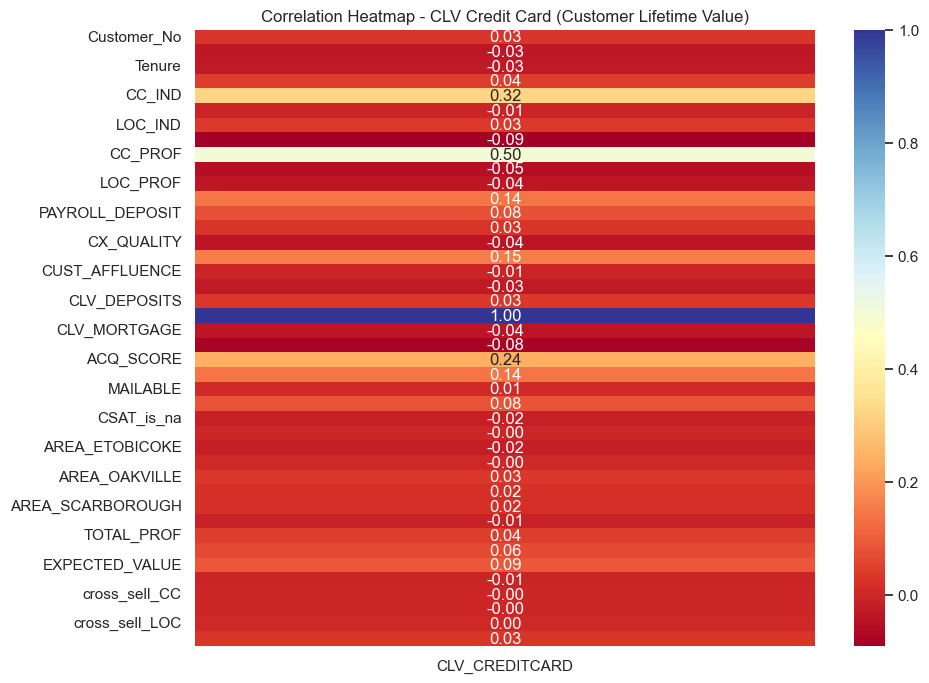

In [ ]:
# Compute the correlation matrix
correlation_matrix3 = case_data.drop(columns=['acquisition_labels']).corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix3[['CLV_CREDITCARD']], annot=True, cmap='RdYlBu', fmt=".2f")
plt.title('Correlation Heatmap - CLV Credit Card (Customer Lifetime Value)')
plt.show()

In [ ]:
credit_card_data = case_data[['CC_IND','MOBILE_ACTIVE','CLV_CREDITCARD','EMAILABLE','MAILABLE']][case_data['CC_IND'] == 0].sort_values(by=['CLV_CREDITCARD'])

# Calculating the number of rows in each decile
num_rows = len(credit_card_data)
rows_per_decile = num_rows // 10

credit_card_data['deciles'] = [(i // rows_per_decile) + 1 for i in range(num_rows)]

In [ ]:
credit_card_data['approval_rate'] = 0

In [ ]:
credit_card_data['approval_rate'][credit_card_data['deciles'] == 1] = 0.35
credit_card_data['approval_rate'][credit_card_data['deciles'] == 2] = 0.35
credit_card_data['approval_rate'][credit_card_data['deciles'] == 3] = 0.35
credit_card_data['approval_rate'][credit_card_data['deciles'] == 4] = 0.4
credit_card_data['approval_rate'][credit_card_data['deciles'] == 5] = 0.4
credit_card_data['approval_rate'][credit_card_data['deciles'] == 6] = 0.5
credit_card_data['approval_rate'][credit_card_data['deciles'] == 7] = 0.55
credit_card_data['approval_rate'][credit_card_data['deciles'] == 8] = 0.6
credit_card_data['approval_rate'][credit_card_data['deciles'] == 9] = 0.65
credit_card_data['approval_rate'][credit_card_data['deciles'] == 10] = 0.65
credit_card_data['approval_rate'][credit_card_data['deciles'] == 11] = 0.65

C:\Users\91967\AppData\Local\Temp\ipykernel_28032\34641666.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  credit_card_data['approval_rate'][credit_card_data['deciles'] == 1] = 0.35
C:\Users\91967\AppData\Local\Temp\ipykernel_28032\34641

In [ ]:
credit_card_data['email_cost'] = 0
credit_card_data['mail_cost'] = 0
credit_card_data['call_cost'] = 0

In [ ]:
credit_card_data.loc[credit_card_data['EMAILABLE'] == 1, 'email_cost'] = credit_card_data['approval_rate'] * 100
credit_card_data.loc[credit_card_data['MAILABLE'] == 1, 'mail_cost'] = 2 + credit_card_data['approval_rate'] * 150
credit_card_data.loc[credit_card_data['MOBILE_ACTIVE'] == 1, 'call_cost'] = 10 + (credit_card_data['approval_rate'] * 150 * 0.2)

C:\Users\91967\AppData\Local\Temp\ipykernel_28032\3163136413.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[35. 35. 35. ... 65. 65. 65.]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  credit_card_data.loc[credit_card_data['EMAILABLE'] == 1, 'email_cost'] = credit_card_data['approval_rate'] * 100
C:\Users\91967\AppData\Local\Temp\ipykernel_28032\3163136413.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[54.5 54.5 54.5 ... 99.5 99.5 99.5]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  credit_card_data.loc[credit_card_data['MAILABLE'] == 1, 'mail_cost'] = 2 + credit_card_data['approval_rate'] * 150
C:\Users\91967\AppData\Local\Temp\ipykernel_28032\3163136413.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated 

In [ ]:
credit_card_data

,CC_IND,MOBILE_ACTIVE,CLV_CREDITCARD,EMAILABLE,MAILABLE,deciles,approval_rate,email_cost,mail_cost,call_cost
4852,0,1,-50.805,1,1,1,0.35,35.0,54.5,20.5
4132,0,1,-15.265,1,1,1,0.35,35.0,54.5,20.5
1293,0,1,-14.880,1,1,1,0.35,35.0,54.5,20.5
6474,0,1,-6.825,1,0,1,0.35,35.0,0.0,20.5
8583,0,1,-4.360,1,0,1,0.35,35.0,0.0,20.5
...,...,...,...,...,...,...,...,...,...,...
8016,0,1,10692.340,1,0,11,0.65,65.0,0.0,29.5
1105,0,0,10937.995,0,1,11,0.65,0.0,99.5,0.0
7912,0,1,11074.940,1,1,11,0.65,65.0,99.5,29.5
2958,0,1,11961.910,1,1,11,0.65,65.0,99.5,29.5


In [ ]:
credit_card_data['cross_sell_profit'] = (credit_card_data['CLV_CREDITCARD']*credit_card_data['approval_rate']) - (credit_card_data['email_cost'] + credit_card_data['mail_cost'] + credit_card_data['call_cost'])

In [ ]:
credit_card_data.groupby('deciles').mean()

,CC_IND,MOBILE_ACTIVE,CLV_CREDITCARD,EMAILABLE,MAILABLE,approval_rate,email_cost,mail_cost,call_cost,cross_sell_profit
deciles,,,,,,,,,,
1,0.0,0.671642,-0.471716,0.671642,0.522388,0.35,23.507463,28.470149,13.768657,-65.911369
2,0.0,0.601990,0.000000,0.601990,0.577114,0.35,21.069652,31.452736,12.340796,-64.863184
3,0.0,0.587065,0.000000,0.587065,0.597015,0.35,20.547264,32.537313,12.034826,-65.119403
4,0.0,0.631841,0.000000,0.631841,0.532338,0.40,25.273632,33.004975,13.900498,-72.179104
5,0.0,0.636816,0.000000,0.636816,0.492537,0.40,25.472637,30.537313,14.009950,-70.019900
6,0.0,0.616915,0.000000,0.616915,0.537313,0.50,30.845771,41.373134,15.422886,-87.641791
7,0.0,0.651741,0.000000,0.651741,0.522388,0.55,35.845771,44.141791,17.271144,-97.258706
8,0.0,0.601990,0.000000,0.601990,0.636816,0.60,36.119403,58.587065,16.855721,-111.562189
9,0.0,0.721393,120.450697,0.721393,0.497512,0.65,46.890547,49.502488,21.281095,-39.381177


#### Campaign 3

In [ ]:
case_data.columns

Index(['Customer_No', 'Age_Group', 'Tenure', 'DEP_IND', 'CC_IND', 'MTG_IND',
       'LOC_IND', 'DEP_PROF', 'CC_PROF', 'MTG_PROF', 'LOC_PROF',
       'MOBILE_ACTIVE', 'PAYROLL_DEPOSIT', 'CSAT', 'CX_QUALITY',
       'CUST_ENGAGEMENT', 'CUST_AFFLUENCE', 'SEGMENT', 'CLV_DEPOSITS',
       'CLV_CREDITCARD', 'CLV_MORTGAGE', 'CLV_LOC', 'ACQ_SCORE', 'EMAILABLE',
       'MAILABLE', 'MILLENNIAL', 'CSAT_is_na', 'AREA_BEACHES',
       'AREA_ETOBICOKE', 'AREA_NORTH YORK', 'AREA_OAKVILLE',
       'AREA_RICHMOND HILL', 'AREA_SCARBOROUGH', 'AREA_TORONTO', 'TOTAL_PROF',
       'TOTAL_CLV', 'acquisition_labels', 'EXPECTED_VALUE', 'cross_sell_DEP',
       'cross_sell_CC', 'cross_sell_MTG', 'cross_sell_LOC', 'CSAT_decile'],
      dtype='object')

In [ ]:
no_payroll_data = case_data[['DEP_IND', 'CC_IND', 'MTG_IND',
       'LOC_IND', 'DEP_PROF', 'CC_PROF', 'MTG_PROF', 'LOC_PROF',
       'MOBILE_ACTIVE', 'PAYROLL_DEPOSIT','EMAILABLE',
       'MAILABLE',]][case_data['PAYROLL_DEPOSIT'] == 0]
no_payroll_data

,DEP_IND,CC_IND,MTG_IND,LOC_IND,DEP_PROF,CC_PROF,MTG_PROF,LOC_PROF,MOBILE_ACTIVE,PAYROLL_DEPOSIT,EMAILABLE,MAILABLE
0,1,0,0,1,-106,0,0,357.20,1,0,1,1
1,1,0,0,1,-186,0,0,1242.60,1,0,1,0
2,1,1,1,1,-193,984,1402,-136.80,1,0,1,1
5,0,1,1,1,0,-118,8487,1275.85,1,0,1,1
8,1,1,1,1,16,1691,-812,27.55,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9991,1,0,1,0,-35,0,2798,0.00,0,0,0,0
9993,0,0,1,1,0,0,2010,-222.30,0,0,0,1
9994,1,1,0,0,-99,424,0,0.00,1,0,1,1
9995,1,1,1,0,-141,-1559,10588,0.00,1,0,1,0


In [ ]:
no_payroll_data['email_cost'] = 0
no_payroll_data['mail_cost'] = 0
no_payroll_data['call_cost'] = 0

In [ ]:
no_payroll_data.loc[no_payroll_data['EMAILABLE'] == 1, 'email_cost'] = 0
no_payroll_data.loc[no_payroll_data['MAILABLE'] == 1, 'mail_cost'] = 2
no_payroll_data.loc[no_payroll_data['MOBILE_ACTIVE'] == 1, 'call_cost'] = 10

In [ ]:
no_payroll_data['total_cost'] = no_payroll_data['email_cost'] + no_payroll_data['mail_cost'] + no_payroll_data['call_cost']
no_payroll_data['total_cost'].sum()

40304

In [ ]:
c3_total_cost = len(no_payroll_data)*250*0.5 + no_payroll_data['total_cost'].sum()
c3_total_cost

641929.0

In [ ]:
marketing_roi = ((5000*len(no_payroll_data)*0.5 - c3_total_cost)/c3_total_cost)*100
marketing_roi

1774.4284804082695